<a href="https://colab.research.google.com/github/lrsilsbee/Analysis/blob/main/Lauren_Silsbee_Capstone_I_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
import io
IBM = pd.read_csv(io.StringIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv'].decode('utf-8')))

Introduction:
A company wants to know if there is a significant difference between female and male employees in monthly income, job satisfaction, and percent salary hike to make sure that the company is treating its employees equally.

Hypothesis:
1 There is a statistically significance difference between female and male employees in monthly income
2 There is a statistically significance difference between female and male employees in job satisfaction
3 There is a statistically significance difference between female and male employees percent salary increase

Data:
This fictional dataset is from Kaggle and contains 1470 observations and 35 variables. There are no missing values. There are 882 male employees and 588 female employees included in the data.

Methods:
I created two data frames, one with all the data for female employees and a second containing all the data for male employees. I then compared these dataframes along multiple indicators: monthly income, job satisfaction, and percent salary increase. I first determined whether the variables were normally distributed (using histograms and skewness/kurtosis estimates). I then used Krustal and Mann Whitney U tests because the distributions did not seem to be normal.

In [ ]:
print(IBM.shape)

IBM['EmployeeNumber'].duplicated().any()
#Returns False, can use EmployeeNumber as a unique identifier

IBM.isnull().any()

(1470, 35)


Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

###Hypothesis 1:
There is a statistically significant difference between male and female employees in Monthly Income

4837.5
5081.5
(882, 35)
(588, 35)
The sample sizes are 882 and 588. These are large enough to proceed.


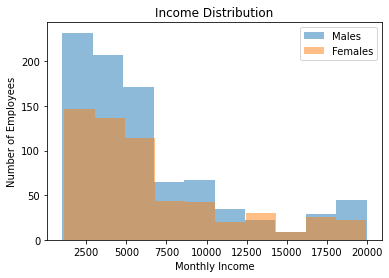

DescribeResult(nobs=882, minmax=(1009, 19999), mean=6380.507936507936, variance=22229872.540799595, skewness=1.4402980490941728, kurtosis=1.2428730146891933)
DescribeResult(nobs=588, minmax=(1129, 19973), mean=6686.566326530612, variance=22048739.251129925, skewness=1.265405982460292, kurtosis=0.6588763943837175)
(0.8169718384742737, 1.709933327621381e-30)
(0.8416616916656494, 9.378564564919968e-24)
KruskalResult(statistic=2.9031804931215315, pvalue=0.08840496463107667)
MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)


In [ ]:
#create two dataframes, one with all the male employees and another with all female employees
Males = IBM[IBM['Gender']=='Male']
Females = IBM[IBM['Gender']=='Female']

print(Males['MonthlyIncome'].median())
print(Females['MonthlyIncome'].median())

print(Males.shape)
print(Females.shape)

print('The sample sizes are 882 and 588. These are large enough to proceed.')

#Check for normal distribution

plt.hist(Males['MonthlyIncome'], alpha = .5, label = 'Males')
plt.hist(Females['MonthlyIncome'], alpha = .5, label = 'Females')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.title('Income Distribution')
plt.legend()
plt.show()


# This does not look like a normal distribution

print(stats.describe(Males['MonthlyIncome']))
print(stats.describe(Females['MonthlyIncome']))


#Skew and Kurtosis numbers are close to normal, but the histogram is far from normal
print(stats.shapiro(Males['MonthlyIncome']))
print(stats.shapiro(Females['MonthlyIncome']))


#The histogram does not look normal. And the Shapiro results indicate that 
#it is not normal
#Conduct kruskal: 
print(stats.kruskal(
    Males['MonthlyIncome'],
    Females['MonthlyIncome']))

#The p value is too high for kruskal to reject the null
print(stats.mannwhitneyu(Males['MonthlyIncome'], Females['MonthlyIncome']))

The histogram shows that this is not normally distributed. The Kruskal test tells us that we cannot reject the null and the Mann Whitney U p value is so close to .05. I do not think this difference is significant. It does not appear that there is a statistically significance difference between men and women's monthly incomes. In the future, I could drop the people who make A LOT of money and see if that makes a difference. It is possible that these outliers are altering the results.

###Hypothesis 2:
There is a statistically significant difference between men and women in job satisfaction

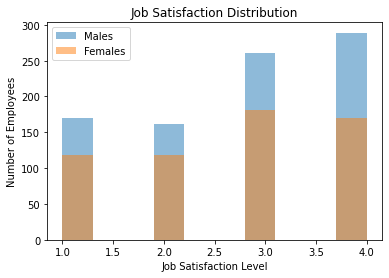

3.0
3.0
DescribeResult(nobs=882, minmax=(1, 4), mean=2.758503401360544, variance=1.2253816396024926, skewness=-0.3670963806181623, kurtosis=-1.2089087287406801)
DescribeResult(nobs=588, minmax=(1, 4), mean=2.683673469387755, variance=1.2013002816117928, skewness=-0.274792780632431, kurtosis=-1.2330637196398142)
(0.8407873511314392, 8.381994387216348e-29)
(0.8519268035888672, 4.750763024855379e-23)
KruskalResult(statistic=1.8645854293926603, pvalue=0.17209650750304156)
MannwhitneyuResult(statistic=248820.5, pvalue=0.0860584779427192)


In [ ]:
#Check for normal distribution

plt.hist(Males['JobSatisfaction'], alpha = .5, label = 'Males')
plt.hist(Females['JobSatisfaction'], alpha = .5, label = 'Females')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Employees')
plt.title('Job Satisfaction Distribution')
plt.legend()
plt.show()

print(Males['JobSatisfaction'].median())
print(Females['JobSatisfaction'].median())


# Job satisfaction is ordinal so the histogram is not too helpful
#Calculate the skew, kurtosis, and W to determine if we can proceed

print(stats.describe(Males['JobSatisfaction']))
print(stats.describe(Females['JobSatisfaction']))
#Skew and Kurtosis numbers are close enough to normal


print(stats.shapiro(Males['JobSatisfaction']))
print(stats.shapiro(Females['JobSatisfaction']))
#The histogram is not very helpful and the shapiro results indicate non-normality, but
#The skew and kurtosis numbers are good. Let's do Kruskal instead of a t test to be safe:

print(stats.kruskal(
    Males['JobSatisfaction'],
    Females['JobSatisfaction']))

#And a Mann Whitney U test:
print(stats.mannwhitneyu(Males['JobSatisfaction'], Females['JobSatisfaction']))

The distributions look similar (though there are more male employees), the p values are too high, and the bloxplot illustrates that there is no difference. Altogether, the results indicate that I cannot reject the null. There is no statistically significance difference between men and women in terms of job satisfaction. Perhaps the result would have been different if job satisfaction had been measured on a longer scale, from perhaps 1-10 instead of 1-4.

###Hypothesis 3:
There is a significant difference between male and female employees in their percent salary increases

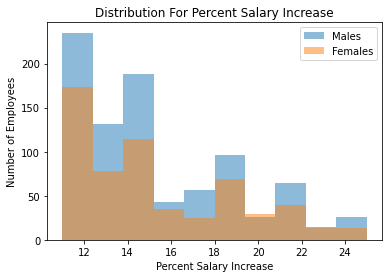

14.0
14.0
DescribeResult(nobs=882, minmax=(11, 25), mean=15.217687074829932, variance=13.210220296972365, skewness=0.8449800914788632, kurtosis=-0.2362135585341516)
DescribeResult(nobs=588, minmax=(11, 25), mean=15.197278911564625, variance=13.69525663757837, skewness=0.7853167355405474, kurtosis=-0.4000754802981965)
(0.900299608707428, 1.688561185246645e-23)
(0.8994561433792114, 3.348263751443677e-19)
KruskalResult(statistic=0.14404550476354075, pvalue=0.7042919014756945)
MannwhitneyuResult(statistic=256300.0, pvalue=0.3521693702696799)


In [ ]:
#First, check to make sure the variable is normally distributed:
plt.hist(Males['PercentSalaryHike'], alpha = .5, label = 'Males')
plt.hist(Females['PercentSalaryHike'], alpha = .5, label = 'Females')
plt.xlabel('Percent Salary Increase')
plt.ylabel('Number of Employees')
plt.title('Distribution For Percent Salary Increase')
plt.legend()
plt.show()


print(Males['PercentSalaryHike'].median())
print(Females['PercentSalaryHike'].median())
#look at skew and kurtosis
print(stats.describe(Males['PercentSalaryHike']))
print(stats.describe(Females['PercentSalaryHike']))

#get shapiro
print(stats.shapiro(Males['PercentSalaryHike']))
print(stats.shapiro(Females['PercentSalaryHike']))

# let's look at the Kruskal
print(stats.kruskal(
    Males['PercentSalaryHike'],
    Females['PercentSalaryHike']))


print(stats.mannwhitneyu(Males['PercentSalaryHike'], Females['PercentSalaryHike']))

The histogram indicates that this is not normally distributed, but the skew and kurtosis numbers are fine. The shapiro results and the histogram lead me to think that this is not normally distributed, so it would be better to do a non-parametric test. The krusal results indicate that I cannot reject the null that the data samples are drawn from the same distribution. The Mann Whitney U results indicate that the p value is too high to be able to reject the null, The results indicate that there is no statistically significant difference between men and women in terms of Percent Salary hike.

###Conclusion
I could not reject the null for all three hypotheses. However, this is actually a positive result because it indicates that the employees are not discriminated based on gender. The results indicate that there are no statistically significant differences between male and female employees in terms of their monthly income, job satisfaction, and percent salary increases.

In the future, I would like to examine whether certain positions experience higher job satisfaction levels. It would also be interesting to remove the outliers and examine whether that makes a difference in the analysis.